In [6]:
# pip install opencv-python
# pip install numpy
# !conda install -c https://conda.binstar.org/menpo opencv

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("hand_four_fingers.jpg")

# Convert the image to a matrix (NumPy array)
image_matrix = np.array(image)

# Display the matrix
print(image_matrix)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [33]:
# To convert the matrix obtained from an image into a binary matrix, you can apply a thresholding operation. 
# This operation sets a threshold value and assigns a binary value (0 or 1) to each element in the matrix
# based on whether it is below or above the threshold. Here's an example of how you can do it:

import cv2
import numpy as np

# Load the image
image = cv2.imread("hand_four_fingers.jpg", 0)  # Read the image in grayscale (0 flag)

# Set the threshold value
threshold = 128

# Apply thresholding
binary_matrix = np.where(image > threshold, 1, 0)

# Display the binary matrix
binary_matrix
np.any(binary_matrix ==0)



True

In [13]:
binary_matrix.shape

(1023, 1023)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Kohonen:
    def __init__(self, map_shape, learning_rate=0.1, sigma=1.0):
        self.map_shape = map_shape
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.weights = np.random.rand(map_shape[0], map_shape[1], 2) # Initialize the weight matrix

    def find_best_matching_unit(self, input_vector):
        distances = np.linalg.norm(self.weights - input_vector, axis=2) # Euclidean distance between input_vector and each weight vector
        bmu_index = np.unravel_index(np.argmin(distances), distances.shape) # Find the index of the best matching unit (BMU)
        return bmu_index

    def update_weights(self, input_vector, bmu_index):
        distance_squares = np.sum((np.indices(self.map_shape) - np.array(bmu_index)[:, np.newaxis, np.newaxis]) ** 2, axis=0)
        neighborhood = np.exp(-distance_squares / (2 * self.sigma ** 2))
        self.weights += self.learning_rate * neighborhood[:, :, np.newaxis] * (input_vector - self.weights)

    def train(self, input_data, num_epochs):
        for epoch in range(num_epochs):
            np.random.shuffle(input_data)

            for input_vector in input_data:
                bmu_index = self.find_best_matching_unit(input_vector)
                self.update_weights(input_vector, bmu_index)

    def get_weights(self):
        return self.weights

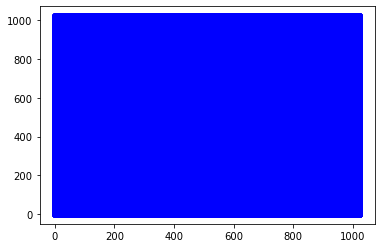

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Example binary matrix
binary_matrix = np.array(binary_matrix)

# Get the shape of the binary matrix
rows, cols = binary_matrix.shape

# Generate coordinates for scatter plot
x = []
y = []

for i in range(rows):
    for j in range(cols):
        if binary_matrix[i, j] == 1:
            x.append(i)
            y.append(j)

# Scatter plot
# plt.scatter(x, y)
# plt.xlabel('Column')
# plt.ylabel('Row')
# plt.title('Scatter plot of Binary Matrix')
plt.scatter(x, y, color='blue', label='Input Data')

plt.show()

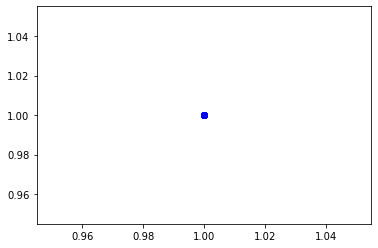

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Example binary matrix
input_data = np.array(binary_matrix)

# Generate the indices where the binary matrix is 1
# indices = np.argwhere(new_matrix == 1)

# # Separate the x and y coordinates
# x = indices[:, 1]
# y = indices[:, 0]


# # Scatter plot
# plt.scatter(x, y)
# plt.xlabel('Column')
# plt.ylabel('Row')
# plt.title('Scatter plot of Binary Matrix')
# plt.show()
plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')

In [38]:
%pip install pylance

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.



  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4


In [44]:
import cv2
import numpy as np

def generate_boundary_points(image_path, num_points):
    # Load the image
    img = cv2.imread(image_path, 0)  # Load as grayscale

    # Apply edge detection
    edges = cv2.Canny(img, 100, 200)

    # Find the boundary coordinates
    boundary_pixels = np.argwhere(edges == 255)
    num_boundary_pixels = len(boundary_pixels)

    # Generate uniformly distributed indices along the boundary
    indices = np.linspace(0, num_boundary_pixels - 1, num_points, dtype=int)

    # Extract the boundary points
    boundary_points = boundary_pixels[indices]

    # Normalize the boundary points to the range [0, 1]
    boundary_points_normalized = boundary_points.astype(float) / img.shape[1], img.shape[0]

    return boundary_points_normalized


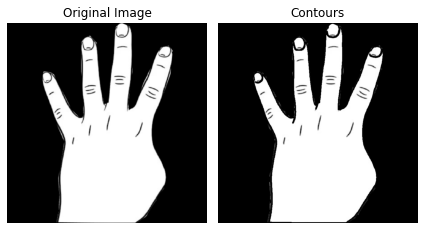

In [52]:
import cv2
import matplotlib.pyplot as plt

def find_shape_boundaries(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, 0)

    # Apply thresholding to convert the image to binary
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an image with only the contours drawn
    contour_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)

    # Display the images
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(contour_img, cmap='gray')
    plt.title('Contours')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Provide the path to your image file
image_path = './hand_four_fingers.png'

# Find and display the boundaries of the shape in the image
find_shape_boundaries(image_path)

In [134]:
# def normalize_points(point, x_range, y_range):   
#     x_min, x_max = x_range
#     y_min, y_max = y_range
#     # print(x_min, x_max)
#     # print(y_min, y_max)
#     x_curr, y_curr = point[0]

#     new_x = float(x_curr - x_min) / (x_max - x_min)
#     new_y = float(y_curr - y_min) / (y_max - y_min)
#     print("new values:" ,new_x,new_y)

#     point[0] = new_x, new_y

#     return point
def normalize_contour(contour, x_range, y_range):
    x_min, x_max = x_range
    y_min, y_max = y_range

    normalized_contour = []

    for point in contour:
        x_curr, y_curr = point[0]

        new_x = float(x_curr - x_min) / (x_max - x_min)
        new_y = float(y_curr - y_min) / (y_max - y_min)

        normalized_contour.append([[new_x, new_y]])

    return normalized_contour

In [131]:
def find_min_max_contours(contours):
    all_points = np.concatenate(contours)  # Combine all contour points into a single array
    x_values = all_points[:, 0, 0]  # Extract x-coordinates
    y_values = all_points[:, 0, 1]  # Extract y-coordinates

    x_min = np.min(x_values)
    x_max = np.max(x_values)
    y_min = np.min(y_values)
    y_max = np.max(y_values)

    return x_min, x_max, y_min, y_max

129 595 1 718
(129, 595)
(1, 718)
point after:  [[0.8025751072961373, 0.9623430962343096]]
point after:  [[0.796137339055794, 0.9665271966527197]]
point after:  [[0.796137339055794, 0.9679218967921897]]
point after:  [[0.7918454935622318, 0.9707112970711297]]
point after:  [[0.7896995708154506, 0.9707112970711297]]
point after:  [[0.7854077253218884, 0.9735006973500697]]
point after:  [[0.7875536480686696, 0.9735006973500697]]
point after:  [[0.8004291845493562, 0.9651324965132496]]
point after:  [[0.8004291845493562, 0.9637377963737797]]
point after:  [[0.12660944206008584, 0.8870292887029289]]
point after:  [[0.12660944206008584, 0.900976290097629]]
point after:  [[0.12660944206008584, 0.895397489539749]]
point after:  [[0.12875536480686695, 0.8940027894002789]]
point after:  [[0.12660944206008584, 0.8926080892608089]]
point after:  [[0.12660944206008584, 0.8842398884239888]]
point after:  [[0.12446351931330472, 0.8200836820083682]]
point after:  [[0.12446351931330472, 0.821478382147

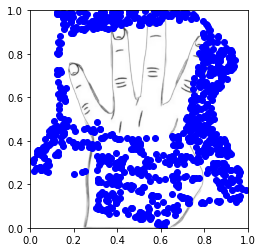

<Figure size 432x288 with 0 Axes>

In [137]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path


def plot_points_inside_contours(image_path, num_points):
    # Load the image in grayscale
    img = cv2.imread(image_path, 0)

    # Apply thresholding to convert the image to binary
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an image with only the contours drawn
    contour_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)

    # Get the contour points
    contour_points = contours[0][:, 0, :]
    # print(contour_points)


    shape_x = []
    shape_y = []
    # xy_list = []

    # x_max= np.max(contours[:, 0, 0])
    # print(contours)
    x_min, x_max, y_min, y_max=find_min_max_contours(contours)
    print(x_min, x_max, y_min, y_max)



    x_range = (x_min, x_max)  # Replace with the x range of your plot
    y_range = (y_min, y_max)  # Replace with the y range of your plot
    print(x_range)
    print(y_range)

    for contour in contours:
        contour=normalize_contour(contour,x_range,y_range)
        
        for point in contour:
            print("point after: ",point)
            # print("point[0] after: ",point[0])
            x, y = point[0]
            shape_x.append(x)
            shape_y.append(y)
    

    print("shapex:",shape_x)
    print("shapey:",shape_y)
    

    # Create the Path object
    vertices = list(zip(shape_x, shape_y))
    path = Path(vertices)


    # Create the Path object
    # vertices = list(zip(contour_points))
    # path = Path(list(contour_points))

    # Generate random points within the shape
    num_points = 3000
    points_x = []
    points_y = []

    for _ in range(num_points):
        # Generate a random point within the shape boundaries
        point_x, point_y = np.random.uniform(0,1), np.random.uniform(0,1)
        
        # Check if the point is within the shape
        is_inside = path.contains_point((point_x, point_y))
        if(is_inside):
            points_x.append(point_x)
            points_y.append(point_y)

    print("points:" , points_x)
    print("points:", points_y)
 

    # Plot the shape
    image=plt.imread(image_path)
    plt.imshow(image,extent=[0, 1.0, 0, 1.0])

    # Scatter plot of the points within the shape
    plt.scatter(points_x, points_y, color='blue')

    # Set the limits of the plot
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Display the plot
    plt.show()
    # Plot the points inside the contour
    # plt.scatter(points_inside_contour[:, 0], points_inside_contour[:, 1], c='red', marker='.')
    # plt.scatter(points_x,points_y, c='red', marker='.')

    plt.tight_layout()
    plt.show()

# Provide the path to your image file
image_path = './hand_four_fingers.png'

# Specify the number of points to generate
num_points = 10000

# Plot the points inside the contours of the shape
plot_points_inside_contours(image_path, num_points)